In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot data, visualizations
import seaborn as sns #visualization with seaborn

from pandas import Series
from sklearn.preprocessing import LabelEncoder #Label Encoding
#ensemble classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier, BaggingClassifier
#Classification Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold # split data into train and test dataset
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score # Model Evaluation

import sys
import os
#kaggle Data source
#print(os.listdir("../input"))
print(os.listdir("D:\DataScience@DKB\Classification")) # Files for analysis

['Classification_Letters.ipynb', 'classification_letters_kg.ipynb', 'Einsteiger-Kurs 6.pdf', 'lettersdata.csv', 'models3.R']


## Data Preparation and Basic Statistics

In [3]:
#load data and print first 5 rows
#df = pd.read_csv('../input/lettersdata.csv', index_col=0)
df = pd.read_csv('D:\DataScience@DKB\Classification\lettersdata.csv', index_col=0)
print(df.head(5))

  lettr  xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  \
1     T     2     8      3     5      1     8    13      0      6      6   
2     I     5    12      3     7      2    10     5      5      4     13   
3     D     4    11      6     8      6    10     6      2      6     10   
4     N     7    11      6     6      3     5     9      4      6      4   
5     G     2     1      3     1      1     8     6      6      6      6   

   x2ybr  xy2br  xege  xegvy  yege  yegvx  
1     10      8     0      8     0      8  
2      3      9     2      8     4     10  
3      3      7     3      7     3      9  
4      4     10     6     10     2      8  
5      5      9     1      7     5     10  


In [4]:
#show basic statistics
df.describe()

,xbox,ybox,width,high,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybr,xy2br,xege,xegvy,yege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
#select first two letters of name 'MALI'
#show data types
df.dtypes

#copy data to new df with selected columns
df_c = df.loc[df['lettr'].isin(['M','A','L','I'])]

print(df_c.head(10))

#show data types
print(df.dtypes)

   lettr  xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  \
2      I     5    12      3     7      2    10     5      5      4     13   
8      A     1     1      3     2      1     8     2      2      2      8   
10     M    11    15     13     9      7    13     2      6      2     12   
14     M     6     9      8     6      9     7     8      6      5      7   
27     M     7    11     11     8      9     3     8      4      5     10   
31     L     2     3      3     4      1     0     1      5      6      0   
32     L     1     3      3     1      1     6     4      1      7      8   
35     M     6     9      9     7      6     5     6      3      5     10   
52     L     3     6      3     4      1     1     0      6      6      0   
60     L     5    10      6     8      5     9     3      2      6      9   

    x2ybr  xy2br  xege  xegvy  yege  yegvx  
2       3      9     2      8     4     10  
8       2      8     1      6     2      7  
10      1      9 

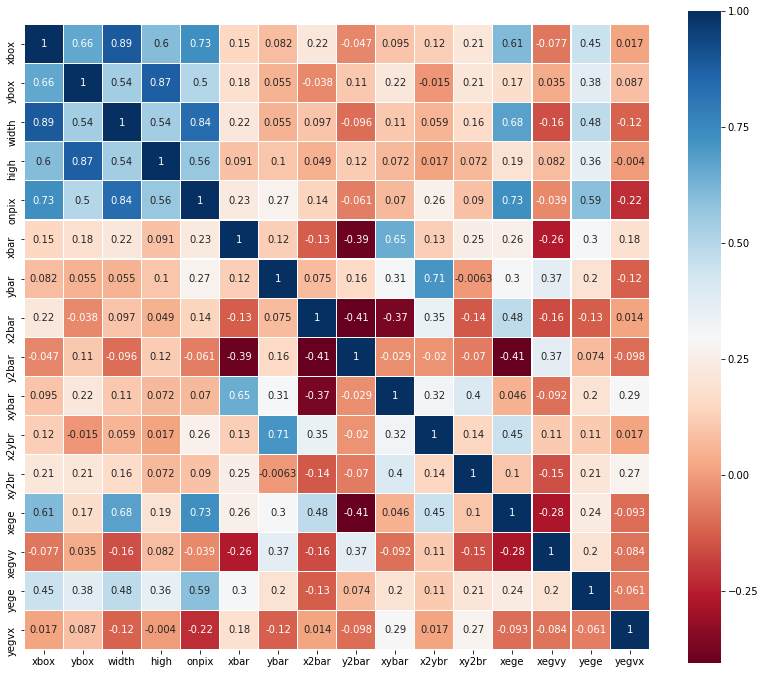

In [6]:
#calculate correlations between dimensions
cor = df_c.corr()

#make correlation heatmap using seaborn lib
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(cor,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()

In [7]:
X = df_c.drop(['lettr'], axis=1)
print(X.head(2))
y = df_c['lettr']
print(y.head(2))
#set seed value
seed = 20
#split data into train and test (and make validation set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
#X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_train.head(2))
print(X_test.shape)
print(X_test.head(2))
print(y_train.head(2))
print(y_test.head(2))

   xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
2     5    12      3     7      2    10     5      5      4     13      3   
8     1     1      3     2      1     8     2      2      2      8      2   

   xy2br  xege  xegvy  yege  yegvx  
2      9     2      8     4     10  
8      8     1      6     2      7  
2    I
8    A
Name: lettr, dtype: object
(2322, 16)
       xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
17121     5     8      6     6      3     7     5      2      7      7      7   
14369     0     0      0     0      0     7     7      4      4      7      6   

       xy2br  xege  xegvy  yege  yegvx  
17121      9     1     10     4      8  
14369      8     0      8     0      8  
(775, 16)
       xbox  ybox  width  high  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybr  \
12511     2     7      3     5      2     7     9      0      6     13      6   
7457      5    10      7     8      8     6     6      6      5   

## Ensembling: Voting Classifiers

LogisticRegression 0.9690322580645161


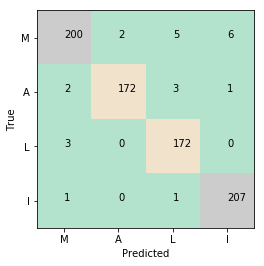

RandomForestClassifier 0.9858064516129033


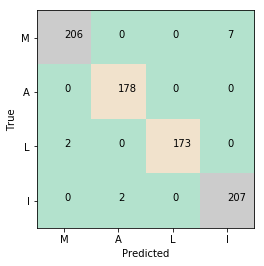

LinearDiscriminantAnalysis 0.9548387096774194


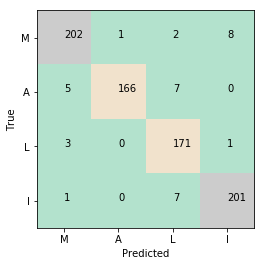

SVC 1.0


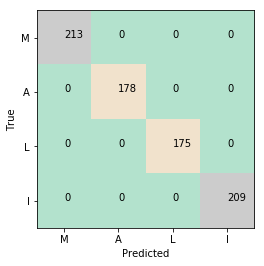

VotingClassifier 0.9909677419354839


C:\Users\lischkem\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


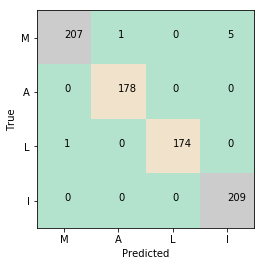

In [8]:
#Ensembling Method: Voting Classifiers (aggregate predictions of each classifier 
#and predict the class that gets the most votes)
lr_clf = LogisticRegression(random_state=seed)
rf_clf = RandomForestClassifier(random_state=seed)
lda_clf = LinearDiscriminantAnalysis()
svm_clf = SVC(random_state=seed, probability=True, gamma='auto')

voting_clf = VotingClassifier(
            estimators=[('lr', lr_clf),('rf', rf_clf),('lda', lda_clf),('svm',svm_clf)],
            voting='soft',
            n_jobs=-1)
voting_clf.fit(X_train, y_train)

for clf in (lr_clf, rf_clf, lda_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classNames = ['M','A','L','I']
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    for i in range(4):
        for j in range(4):
            plt.text(j, i, str(cm[i][j]))
    plt.show()

## Ensembling: Bagging

DT accuracy:  0.9741935483870968
Out-of-Bag Score:  0.9409991386735572
DT with Bagging accuracy:  0.9341935483870968


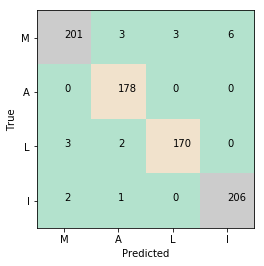

In [9]:
#Ensembling Method: Bagging and Pasting (train the same classifier with different random subsets)
#of training data (Bagging: sampling with replacement (=bootstrap), Pasting: sampling without replacement)

#Train an ensemble of 500 Desicion Tree classifiers on each subset of 100 instances randomly sampled 
#from the entire training set with replacement (bagging). 
#Parameter n_jobs tells Sklearn the number of CPU cores to use (-1 = use all available cores)  
#oob_score = Out of Bag (no need for separate validation set), model can be evaluated on oob instances 

#standard DecisionTree Classifier
dt_clf = DecisionTreeClassifier(random_state=seed)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
#print('y_test',y_test, 'y_pred',y_pred)
print('DT accuracy: ', str(accuracy_score(y_test, y_pred)))

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=seed), n_estimators=500, max_samples=100,
    bootstrap=True, n_jobs=-1, random_state=seed, oob_score=True)
#train the model
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
print('Out-of-Bag Score: ', bag_clf.oob_score_)

print('DT with Bagging accuracy: ', str(accuracy_score(y_test, y_pred_bag)))
#print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
classNames = ['M','A','L','I']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(cm[i][j]))
plt.show()    

## Random Forest and Feature Importance

xbox 0.018872235759973332
ybox 0.008395335048597517
width 0.029452683537217104
high 0.0052813090962644796
onpix 0.023681680051800297
xbar 0.0381143897675187
ybar 0.10266350339848036
x2bar 0.04038322928892553
y2bar 0.16075899193276497
xybar 0.048335985402655456
x2ybr 0.10622972057202046
xy2br 0.0351060317921328
xege 0.2439751716051419
xegvy 0.07651811421268581
yege 0.04015647267812939
yegvx 0.022075145855692146


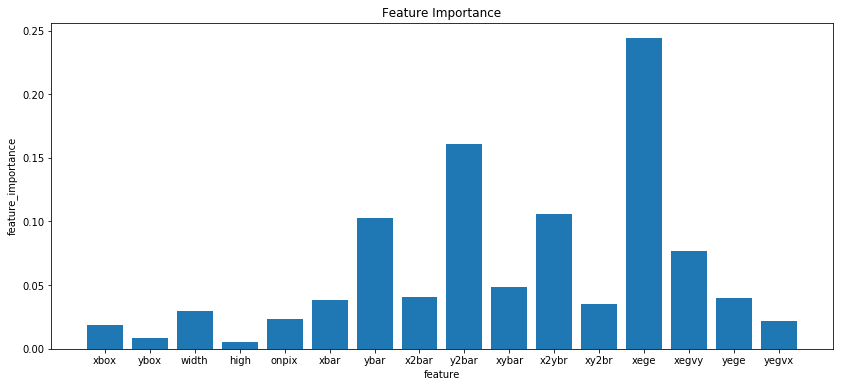

In [12]:
#feature importance provided by Random Forest Classifier measures the importance of different 
#features by looking at how much the tree nodes that use that feature reduce impurity
#on average

feature_list = []
score_list = []

rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(X_train, y_train)
for feature, score in zip(list(X_train), rf_clf.feature_importances_):
    print(feature, score)
    feature_list.append(feature)
    score_list.append(score)
    
#print(feature_list)
#print(score_list)

plt.figure(figsize=(14,6))
plt.title("Feature Importance")
plt.ylabel('feature_importance')
plt.xlabel('feature')
x = feature_list
plt.bar(x, score_list)

plt.show()

## Ensembling: Boosting

ADA accuracy:  0.9509677419354838


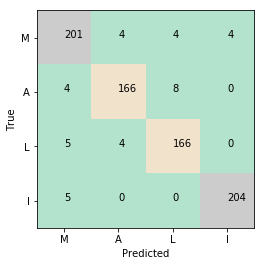

In [13]:
#Ada Boost (Adaptive Boosting) 
#First base classifier is trained and used to make predictions on the training set.
#The relative weight of misclassified training instances is then increased. 
#The second classifier is trained using the updated weights and again it makes predictions
#on the training set (sequential training (learning)).
#SAMME.R (Stagewise Additive Modeling using Multiclass Exp. Loss function)
#R = Real, using class_probabilities (if provided by classifier)

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, 
    algorithm='SAMME.R', learning_rate=0.01)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print('ADA accuracy: ', str(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
classNames = ['M','A','L','I']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(cm[i][j]))
plt.show()    


GB accuracy:  0.9896774193548387


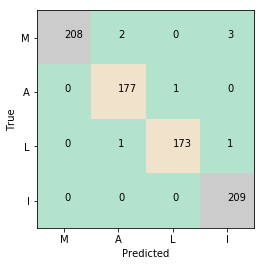

In [14]:
#Gradient Boosting
#sequentially adding predictors to an ensemble, each on correcting its predecessor
#tries to fit the new predictor to the residual errors made by the previous predictor

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=1.0)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
#print(y_pred)
print('GB accuracy: ', str(accuracy_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
classNames = ['M','A','L','I']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(cm[i][j]))
plt.show() 

## Ensembling: Stacking (Blending)

In [22]:
#split data into train and test (and make validation set)
X_train_val1, X_test1, y_train_val1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=seed)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train_val1, y_train_val1, test_size=0.25, random_state=seed)
print('X_train1: ', X_train1.shape)
print('X_test1: ', X_test1.shape)
print('X_train_val1: ', X_train_val1.shape)
print('X_val1: ', X_val1.shape)
print('y_train1: ', y_train1.shape)
print('y_test1: ', y_test1.shape)
print('y_train_val1: ', y_train_val1.shape)
print('y_val1: ', y_val1.shape)



X_train1:  (1741, 16)
X_test1:  (775, 16)
X_train_val1:  (2322, 16)
X_val1:  (581, 16)
y_train1:  (1741,)
y_test1:  (775,)
y_train_val1:  (2322,)
y_val1:  (581,)


In [23]:
#initialize base models
lr1_clf = LogisticRegression(random_state=seed)
dt1_clf = DecisionTreeClassifier(random_state=seed)
lda1_clf = LinearDiscriminantAnalysis()
ada1_clf = AdaBoostClassifier(random_state=seed)
gbm1_clf = GradientBoostingClassifier(random_state=seed)
svc1_clf = SVC(random_state=seed, gamma='auto')
rf1_clf = RandomForestClassifier(random_state=seed)
extr1_clf = ExtraTreesClassifier(random_state=seed)


In [24]:
#Train the first layer models
models = [lr1_clf, dt1_clf, lda1_clf, ada1_clf, gbm1_clf, svc1_clf, rf1_clf, extr1_clf]
for model in models:
    print("Training the", model)
    model.fit(X_train1, y_train1)

Training the LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Training the DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')
Training the LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
Training the AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=20)
Training the GradientBoostingClassifier(criterion='friedman_mse', init=Non

In [25]:
#show model scores
[model.score(X_val1, y_val1) for model in models]



[0.9672977624784854,
 0.9862306368330465,
 0.955249569707401,
 0.4939759036144578,
 1.0,
 0.9982788296041308,
 0.9913941480206541,
 0.9931153184165232]

Label Encoded Predictions [[0. 0. 0. ... 0. 0. 0.]
 [3. 3. 3. ... 3. 3. 3.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 2. 1. ... 2. 2. 2.]
 [3. 3. 3. ... 3. 3. 3.]]
    lr   dt  lda  ada  gbm  svc   rf  extr
0  0.0  0.0  0.0  2.0  0.0  0.0  0.0   0.0
1  3.0  3.0  3.0  3.0  3.0  3.0  3.0   3.0
2  2.0  2.0  2.0  1.0  2.0  2.0  2.0   2.0
3  0.0  0.0  0.0  2.0  0.0  0.0  0.0   0.0
4  2.0  2.0  2.0  2.0  2.0  2.0  2.0   2.0


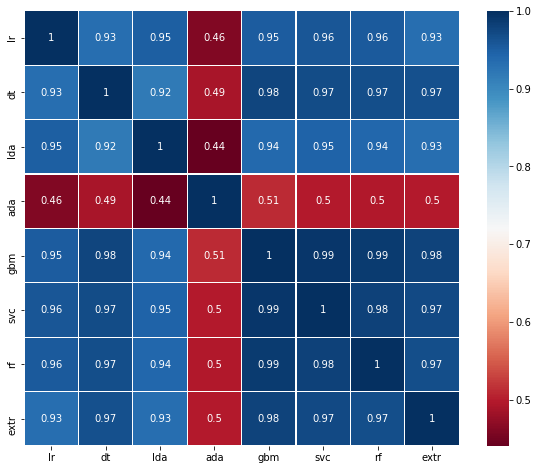

In [26]:
#save X_val predictions for the second layer model
X_val_predictions = np.empty((len(X_val1), len(models)), dtype=np.float32)

for index, model in enumerate(models):
    X_val_predictions[:, index] = le.fit_transform(model.predict(X_val1))
    
print('Label Encoded Predictions', X_val_predictions)

#transform to pd Dataframe to show correlations between model predictions on validation set
pd_corr =  pd.DataFrame(data=X_val_predictions[:,:],   
                        columns=X_val_predictions[0,:])
pd_corr.columns = ['lr','dt','lda','ada','gbm','svc','rf','extr']
print(pd_corr.head(5))

#calculate correlations between models
cor = pd_corr.corr()

#make correlation heatmap using seaborn lib
colormap = plt.cm.RdBu
plt.figure(figsize=(10,8))
sns.heatmap(cor,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()
    

In [27]:
#train the second layer  model
rf_blender = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=seed)
rf_blender.fit(X_val_predictions, y_val1)

print(rf_blender.oob_score_)



1.0


0.9974193548387097


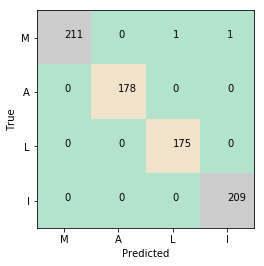

In [28]:
#save X_test predictions

X_test_predictions = np.empty((len(X_test1), len(models)), dtype=np.float32)

for i, model in enumerate(models):
    X_test_predictions[:, i] = le.fit_transform(model.predict(X_test1))

y_pred1 = rf_blender.predict(X_test_predictions)

print(accuracy_score(y_test1, y_pred1))

cm = confusion_matrix(y_test1, y_pred1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
classNames = ['M','A','L','I']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
plt.ylabel('True')
plt.xlabel('Predicted')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(cm[i][j]))
plt.show() 

